<a href="https://colab.research.google.com/github/Aleena24/CaseStudy_Project/blob/main/caseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Kaggle Configurations

In [59]:
!pip install kaggle

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [64]:
!chmod 600 ~/.kaggle/kaggle.json

In [72]:
!kaggle datasets download -d bhavikjikadara/e-commerce-products-images


 99% 279M/283M [00:02<00:00, 123MB/s] 
100% 283M/283M [00:02<00:00, 104MB/s]


In [74]:
!unzip /content/e-commerce-products-images.zip -d /content/e-commerce-products-images


Streaming output truncated to the last 5000 lines.
  inflating: /content/e-commerce-products-images/e-commerce/images/58129.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/5813.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58131.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58132.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58133.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58135.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58136.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58137.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58138.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58139.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/5814.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58140.jpg  
  i

In [75]:
!ls /content/e-commerce-products-images/

e-commerce  styles.csv


# Library Import

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

# Dataset Import

In [79]:
df = pd.read_csv('/content/e-commerce-products-images/styles.csv')
df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

# Image Dataset Import

In [84]:
image_dir = '/content/e-commerce-products-images/e-commerce/images/'

In [86]:
def load_random_images(image_paths, num_images=20):
    random_sample = random.sample(list(image_paths), num_images)
    images = []
    for path in random_sample:
        image_path = os.path.join(image_dir, str(path) + '.jpg')
        img = load_img(image_path, target_size=(128, 128))
        images.append(img)
    return images

random_sample_images = load_random_images(df['id'], num_images=20)

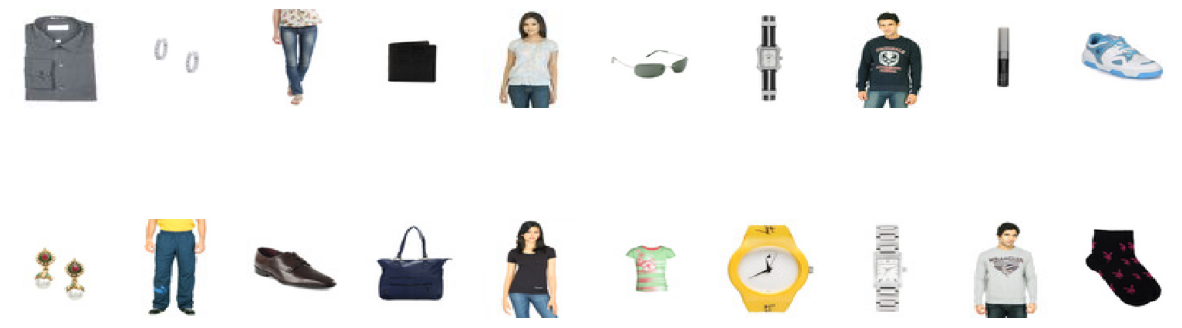

In [87]:
plt.figure(figsize=(15, 5))
for i in range(len(random_sample_images)):
    plt.subplot(2, 10, i + 1)
    plt.imshow(random_sample_images[i])
    plt.axis('off')
plt.show()

# Histogram for product categories

In [88]:
category_histogram = px.histogram(styles_df, x='masterCategory',
                                  title='Distribution of Product Categories',
                                  labels={'masterCategory': 'Product Category'},
                                  color_discrete_sequence=['#636EFA'])
category_histogram.update_layout(xaxis_title='Product Category', yaxis_title='Count')
category_histogram.show()

# Word cloud

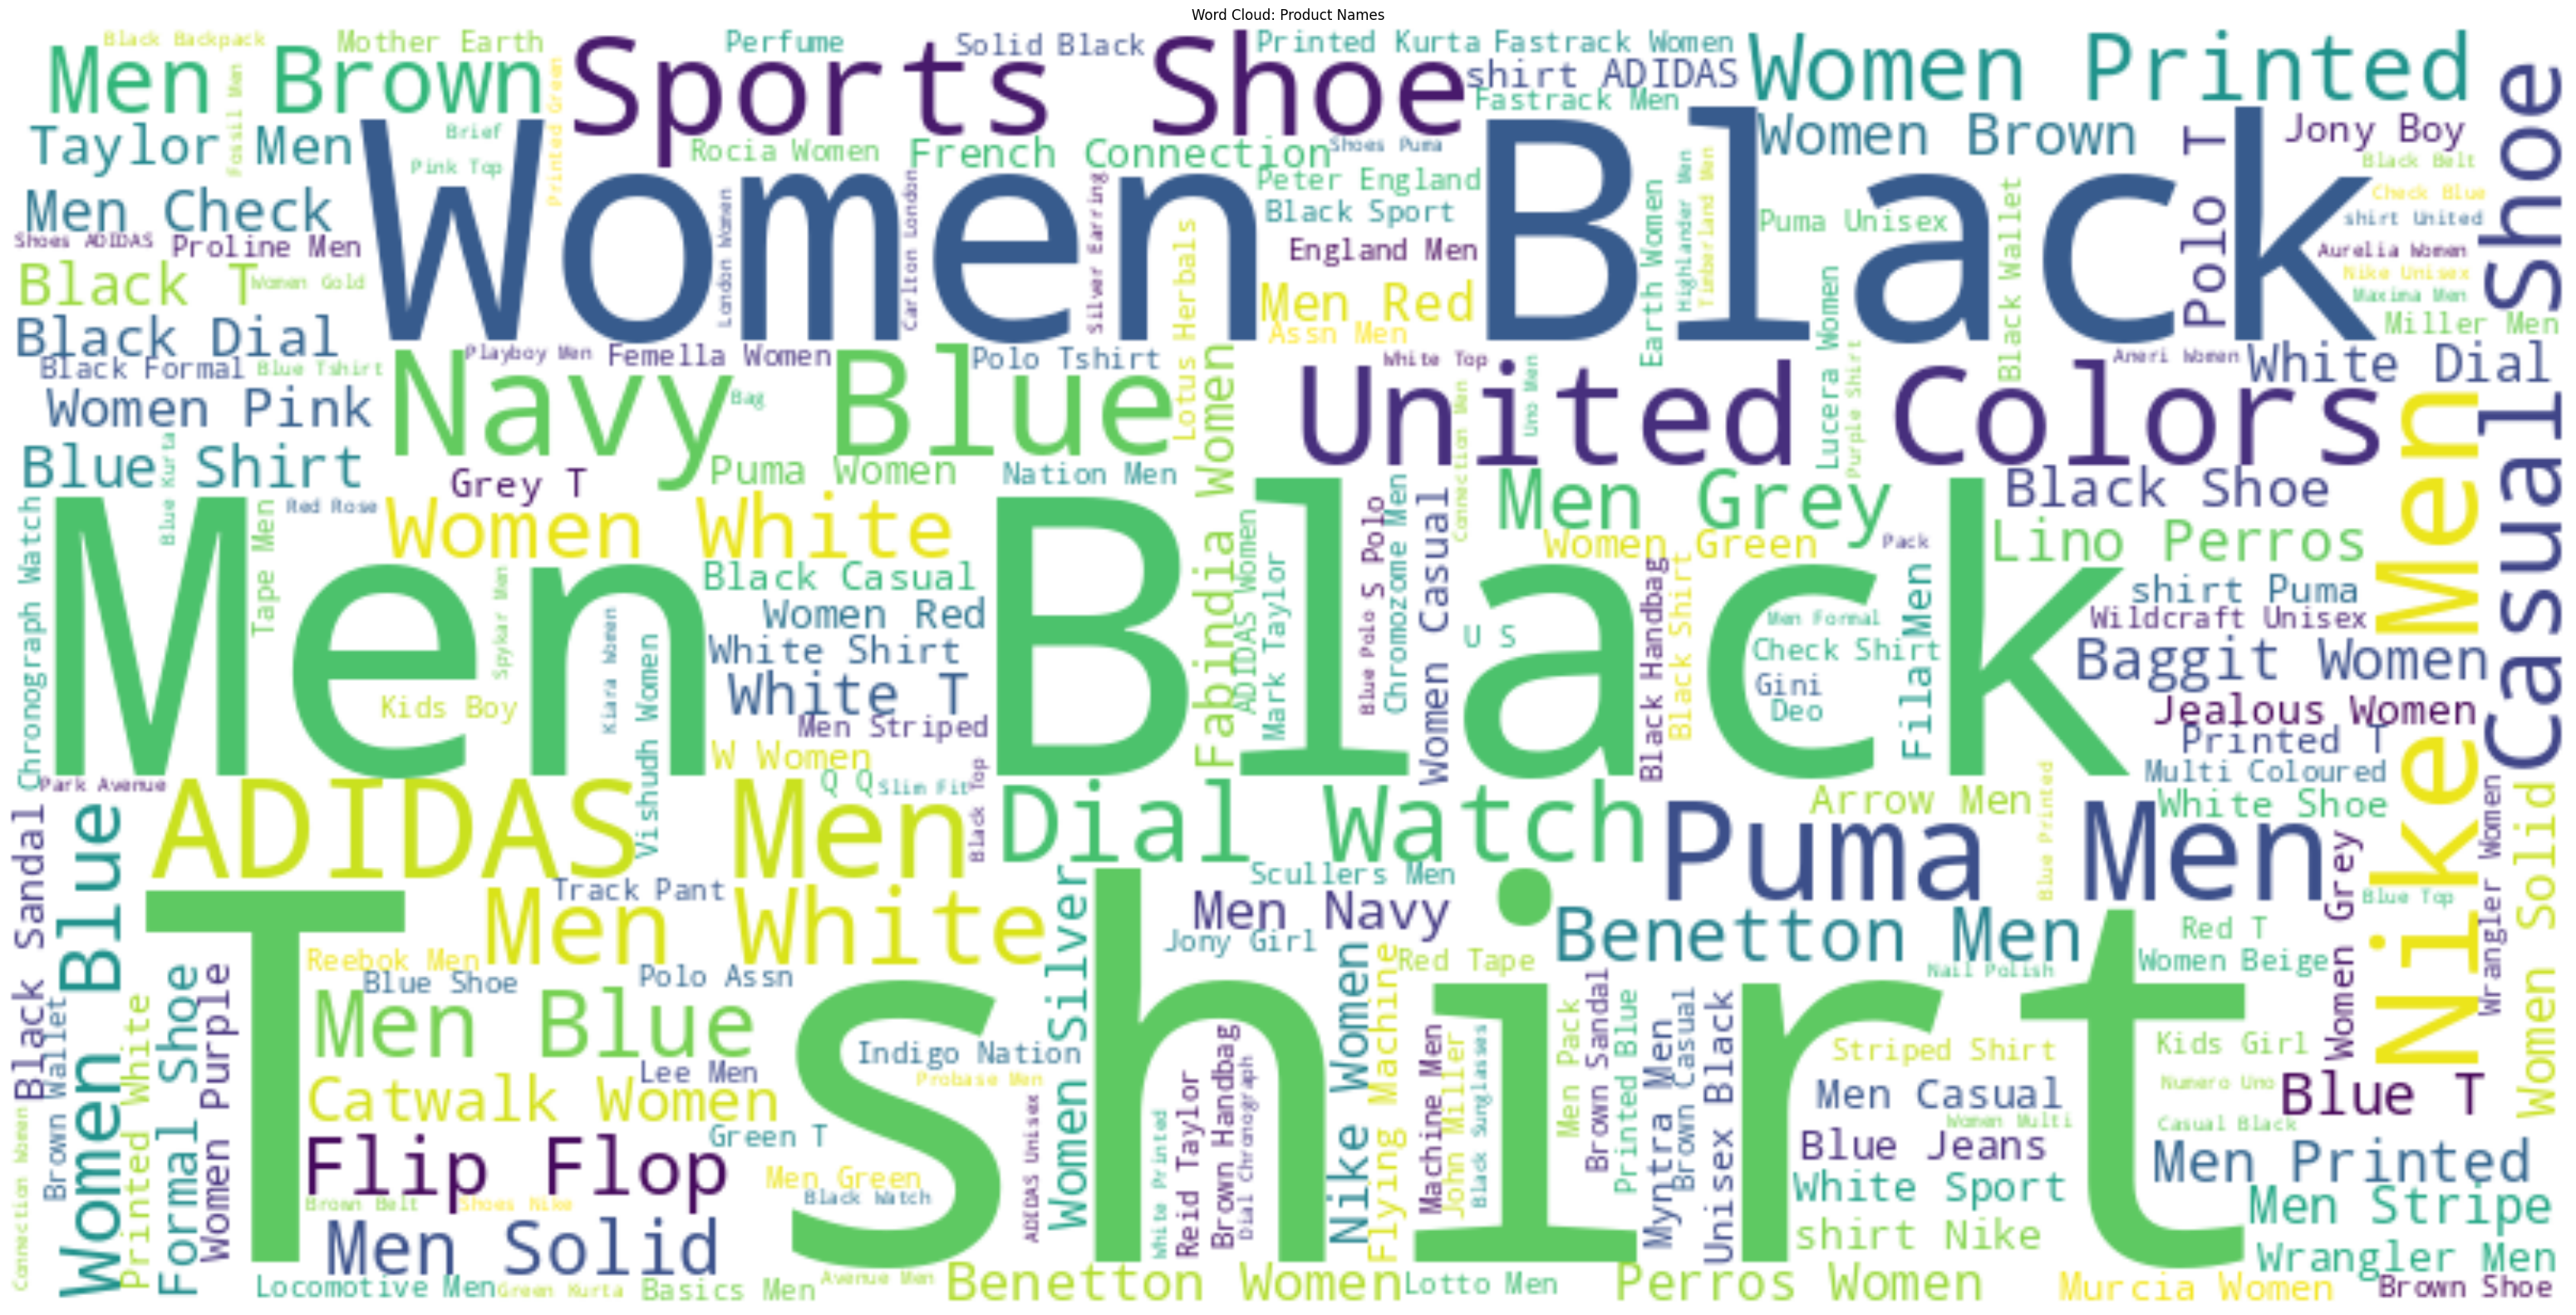

In [89]:
wordcloud_data = ' '.join(df['productDisplayName'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_data)

plt.figure(figsize=(50, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Product Names')
plt.show()

# Box plot

In [90]:
box_plot = px.box(df, x='year', y='id',
                  title='Distribution of Products Over Years',
                  labels={'year': 'Year', 'id': 'Product Count'},
                  color_discrete_sequence=['#FFA07A'])
box_plot.show()


#Stacked bar chart

In [92]:
gender_category_distribution = df.groupby(['masterCategory', 'gender']).size().unstack()

stacked_bar_chart = go.Figure()

for gender in gender_category_distribution.columns:
    stacked_bar_chart.add_trace(go.Bar(x=gender_category_distribution.index,
                                      y=gender_category_distribution[gender],
                                      name=gender))

stacked_bar_chart.update_layout(barmode='stack',
                                title='Gender Distribution in Product Categories',
                                xaxis_title='Product Category',
                                yaxis_title='Count')
stacked_bar_chart.show()

# Season Bar Chart

<ipython-input-94-c66ea85672ab>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




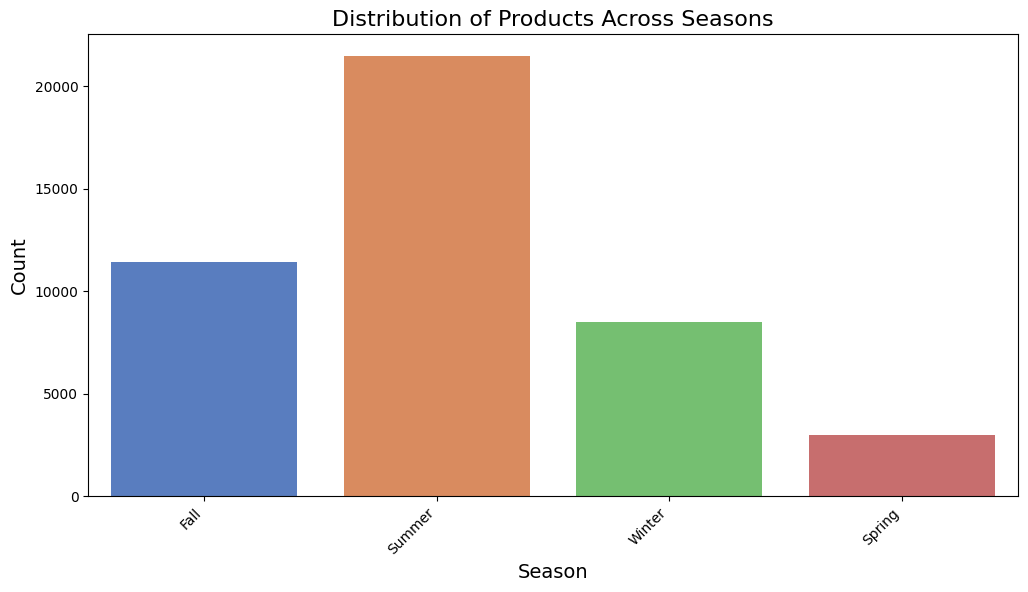

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=df, palette='muted')
plt.title('Distribution of Products Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [95]:
df = df.dropna(subset=['season'])

fig = px.sunburst(df, path=['masterCategory', 'subCategory', 'season'],
                  title='Sunburst Chart: Product Hierarchy and Season',
                  height=600)
fig.show()

# Dataset Preprocessing

In [97]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [100]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenization

In [101]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(filtered_tokens)

Stopwords Removal

In [103]:
def preprocess_text(text):
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''

In [104]:
df['atp'] = df['articleType'].apply(preprocess_text)
df['pdn'] = df['productDisplayName'].apply(preprocess_text)

TF-IDF Vectorization

In [107]:

tfidf_vectorizer = TfidfVectorizer(max_features=171)
articleType_tfidf = tfidf_vectorizer.fit_transform(df['atp']).toarray()
productDisplayName_tfidf = tfidf_vectorizer.fit_transform(df['pdn']).toarray()

articleType_tfidf_df = pd.DataFrame(articleType_tfidf, columns=tfidf_vectorizer.get_feature_names_out())
productDisplayName_tfidf_df = pd.DataFrame(productDisplayName_tfidf, columns=tfidf_vectorizer.get_feature_names_out())


# Image Preprocessing

Image Resizing and Normalization

In [114]:
import os
import cv2

In [115]:
def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    return img

In [113]:
processed_images = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        processed_img = preprocess_image(img_path)
        processed_images.append(processed_img)


# Feature Extraction

# Bert Model

In [116]:
!pip install transformers gensim

In [123]:
from transformers import BertModel, BertTokenizer
import gensim
import torch

In [118]:
bert_model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
model = BertModel.from_pretrained(bert_model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [119]:
def encode_text(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    return inputs

In [126]:
def extract_bert_embeddings(encoded_inputs):
    with torch.no_grad():
        outputs = model(**encoded_inputs)
        embeddings = outputs.last_hidden_state
    return embeddings

In [127]:
encoded_inputs = encode_text("product description")
embeddings = extract_bert_embeddings(encoded_inputs)

# CNN (ResNet)

In [129]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [130]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94765736/94765736 [==============================] - 1s 0us/step


In [131]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [ ]:
visual_features = []
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(image_dir, filename)
        img_array = preprocess_image(img_path)
        features = model.predict(img_array)
        visual_features.append(features.flatten())

1/1 [==============================] - 0s 214ms/step
